# Ad-Click Prediction using Logistic Regression

Using a simulated dataset on online advertisement. The aim  to predict the probability if a user clicks on an online advertisement. 

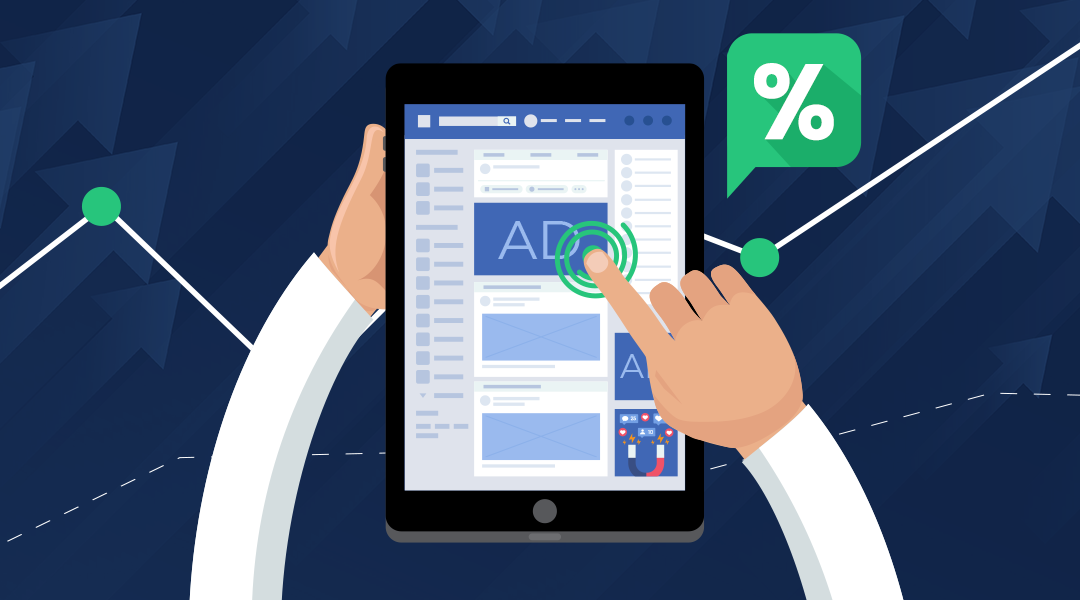

# Load required libraries

In [12]:
import pandas as pd  

import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.utils import shuffle  # To shuffle the response variable


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

# To save and load trained model
from joblib import dump, load

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load the data

In [4]:
df = pd.read_csv('ad_click.csv', encoding='utf-8')

In [5]:
df.head()

,daily_time_spent_on_site,age,area_of_income,daily_internet_usage,ad_title_line,city,gender,country,timestamp,ad_clicked
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


Data contains the following variables:
* **daily_time_spent_on_site**: This is the number of minutes a user spends on the website daily.
* **age**: users age in years
* **area_of_income**: Average annual income of a user in the designated marketing/geographical area.
* **daily_internet_usage**: Average minutes a user spend daily on the net.
* **ad_title_line**: The title of the advertisement (usually in H1)
* **city**: The city names where the users are located
* **gender**: the sexes of the users
* **country**: The country where the users are located
* **timestamp**: Timestamp of the moment the user clicked an ad on the website.
* **ad_clicked**: The record of ad clicks (0: no click and 1: clicked)

We will develop a classification model to predict the *ad_clicked*

# Exploratory data analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   daily_time_spent_on_site  1000 non-null   float64
 1   age                       1000 non-null   int64  
 2   area_of_income            1000 non-null   float64
 3   daily_internet_usage      1000 non-null   float64
 4   ad_title_line             1000 non-null   object 
 5   city                      1000 non-null   object 
 6   gender                    1000 non-null   int64  
 7   country                   1000 non-null   object 
 8   timestamp                 1000 non-null   object 
 9   ad_clicked                1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [7]:
df['ad_clicked'].value_counts()

ad_clicked
0    500
1    500
Name: count, dtype: int64

<font size=''> The data is simulated and have a perfect split of our label. Normally, classification data are highly imbalanced, for example; fraud detection, network intrusion, etc.

In [8]:
df.columns

Index(['daily_time_spent_on_site', 'age', 'area_of_income',
       'daily_internet_usage', 'ad_title_line', 'city', 'gender', 'country',
       'timestamp', 'ad_clicked'],
      dtype='object')

In [9]:
for col in ['ad_title_line', 'city', 'gender', 'country']:
    value_cnt = df[col].value_counts()
    unique_val = df[col].nunique()
    print('{} feature has {} unique groups'.format(col, unique_val))
    print('Five most common groups: \n', value_cnt[:5])
    print('\n')
#     value_cnt = sorted(value_cnt, reverse=True)[:5]
#     print(col, value_cnt)

ad_title_line feature has 1000 unique groups
Five most common groups: 
 ad_title_line
Cloned 5thgeneration orchestration    1
Synchronized multi-tasking ability    1
Customer-focused impactful success    1
Open-source optimizing parallelism    1
Organic logistical adapter            1
Name: count, dtype: int64


city feature has 969 unique groups
Five most common groups: 
 city
Lisamouth       3
Williamsport    3
Wrightburgh     2
Lake Jose       2
Robertfurt      2
Name: count, dtype: int64


gender feature has 2 unique groups
Five most common groups: 
 gender
0    519
1    481
Name: count, dtype: int64


country feature has 237 unique groups
Five most common groups: 
 country
France            9
Czech Republic    9
Peru              8
Turkey            8
Greece            8
Name: count, dtype: int64




In [10]:
df.describe()

,daily_time_spent_on_site,age,area_of_income,daily_internet_usage,gender,ad_clicked
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


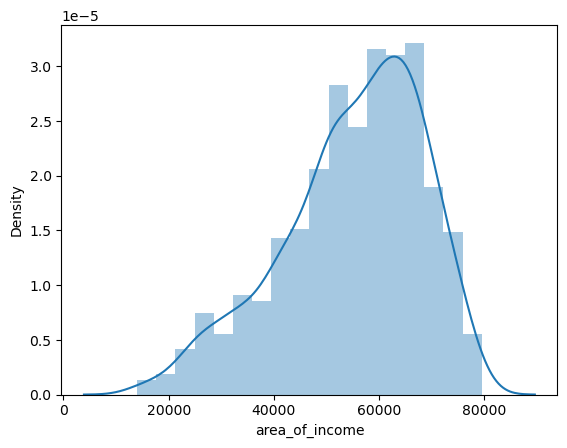

In [13]:
sns.distplot(df['area_of_income'])
plt.show()

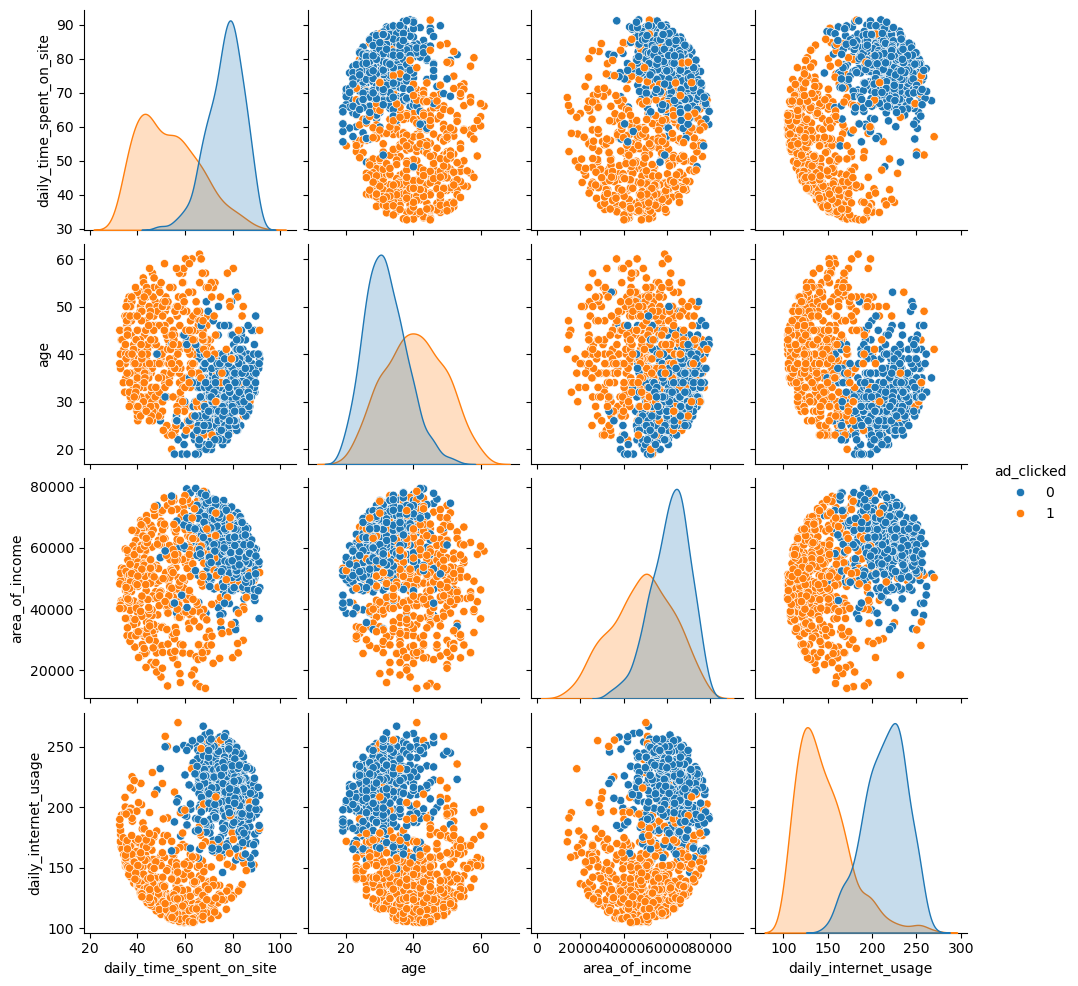

In [14]:
sns.pairplot(df[['daily_time_spent_on_site', 
                     'age', 
                     'area_of_income', 
                     'daily_internet_usage', 
                     'ad_clicked']], hue='ad_clicked')
plt.show()

<font size='4'> The mean and median of the continuous variables are very close, it looks the data is normally distributed. 
    
<font size='4'> We create visualisations to see how are the distributions.

<font size='4'> The plots shows that have skewness in the data
    
<font size='4'> The features in the distribution plot shows a clear pattern that each feature is two clusters and each cluster are highly grouped together based on the our labels

# Data processing and simple feature engineering

In [15]:
df.head()

,daily_time_spent_on_site,age,area_of_income,daily_internet_usage,ad_title_line,city,gender,country,timestamp,ad_clicked
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


<font size='4'> We drop ***ad_title_line*** (1000 unique values) and timestamp

<font size='4'> ***gender*** is already factorized (0 or 1) but ***city*** and ***country*** need to be transformed into dummy variable, but we drop them for first iteration of the model development

In [13]:
## OneHotEnconder (creating dummy variables) can be used to transform city and country features into dummy variables.

# Logistic Regression

## Drop columns

In [16]:
df = df.drop(['ad_title_line', 'timestamp', 'city', 'country'], axis=1)

## Get the features and label

In [18]:
# Shuffle the dataframe
df = shuffle(df, random_state=101)

In [19]:
X = df.drop(['ad_clicked'], axis = 1)
y = df[['ad_clicked']]

## Split the data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=101)

## Fit the model

In [21]:
# Initiate an instance of the LR
logreg = LogisticRegression(random_state=101)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=101)

## Predict with the model

In [22]:
y_pred = logreg.predict(X_test)

In [23]:
y_pred[:10]

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

## Evaluation

### Confusion Matrix

In [24]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[119   7]
 [ 11 113]]


### Precision, Recall and F1 Score

In [25]:
precision_recall_f1 = classification_report(y_test, y_pred)
print(precision_recall_f1)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       126
           1       0.94      0.91      0.93       124

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250



### ROC curve

A Receiver Operating Characteristic (ROC) curve is a graph with the x-axis values as the ***False Positive Rate (FPR)*** and the y-axis values as the ***True Positive Rate (TPR)***. 

The Area Under the Curve (AUC) for the ROC represents how capable a model is at correctly classifying a sample.

ROC Curve is very useful when you have a highly imbalanced response variable/label/target in the dataset.

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
auc_value = auc(fpr, tpr)
print('AUC is {0:.2f}'.format(auc_value))

AUC is 0.93


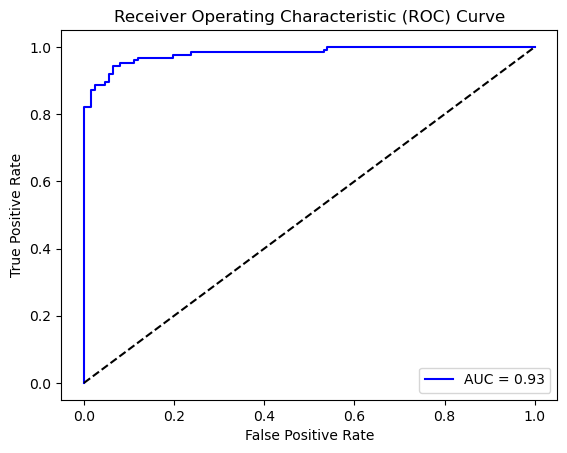

In [28]:
# Calcualte fpr and tpr from prediction probabilities
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

# Plot fpr against tpr
plt.plot(fpr, tpr, color='blue', label='AUC = {0:.2f}'.format(auc_value))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()